<a href="https://colab.research.google.com/github/richbibbi00/progetto_business/blob/main/Dounia_Jaoudi_861219_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1
# Boston Housing price prediction


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries
In the following cell I have imported the libraries needed to compute the problem. Specifically **Keras** has been imported because it allows to build and train neural networks.

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import plot_model

In [3]:
keras.utils.set_random_seed(42)

## Importing the Boston Housing Dataset and building the DataFrame

In the following cells, I have loaded the Boston Housing Dataset and then I created the dataframe associated with it.
As we can see from the table, the dataset has 13 features and 8 attributes. Our target attribute is:

**MEDV**: Median value of owner-occupied homes in \$1000s.

x_train: contains the features of the Boston Housing dataset for the training portion.\
y_train: contains the attributes of the Boston Housing dataset for the training portion.\
x_test: contains the features of the Boston Housing dataset for the testing portion.\
y_test: contains the attributes of the Boston Housing dataset for the testing portion.

`.load_data()` is a method contained in the keras library used to load the dataset.

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


To build the dataframe associated with the dataset, we use **pandas**, one of the libraries imported beforehand.

In [5]:
dframe_x = pd.DataFrame(x_train)

dframe_x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
dframe_y = pd.DataFrame(y_train)

dframe_y.describe()

,0
count,404.000000
mean,22.395050
std,9.210442
min,5.000000
25%,16.675000
50%,20.750000
75%,24.800000
max,50.000000


# Normalizing the data
In order to make the learning easier, we have to normalize the data. To do so,  I took every column in the input data matrix (feature) and I subtracted the mean of the feature and divided by the standard deviation. By doing so, all the feature values will be centered around 0.

In [7]:
# normalized the data
x_train_mean = x_train.mean(axis=0)
x_train_std = x_train.std(axis=0)

x_test_mean = x_test.mean(axis=0)
x_test_std = x_test.std(axis=0)

x_train = (x_train - x_train_mean) / x_train_std
x_test = (x_test - x_test_mean) / x_test_std

# Implementing the neural network using Keras

I have decided to implement the neural networks using a functional API.

The **first model** (model1) has:
- 1 input layer
- 2 hidden layers: each hidden layer has 60 units and the activation function that I have decided to use is the ReLU actvation function because, as seen during the lectures, this is the standard activation function and should be used first to make the proper considerations.
- 1 output layer: the output layer only has 1 unit and uses the same activation function as the hidden layers.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 13)]              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 60)                840       
                                                                 
 hidden_layer_2 (Dense)      (None, 60)                3660      
                                                                 
 output_layer (Dense)        (None, 1)                 61        
                                                                 
Total params: 4561 (17.82 KB)
Trainable params: 4561 (17.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


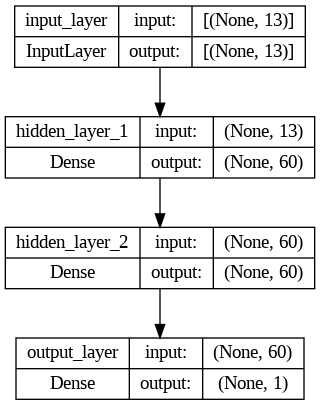

In [8]:
# Defining layers of the network
input_layer = keras.Input(shape=(13), name='input_layer')
hidden_layer_1 = keras.layers.Dense(units=60, activation='relu', name='hidden_layer_1')(input_layer)
hidden_layer_2 = keras.layers.Dense(units=60, activation='relu', name='hidden_layer_2')(hidden_layer_1)
output_layer = keras.layers.Dense(units=1, activation='relu', name='output_layer')(hidden_layer_2)

# Building the model
model1 = keras.Model(inputs=input_layer, outputs=output_layer)
model1.summary()

# Plotting the model
plot_model(model1, show_shapes=True)

The **second model** (model2) has:
- 1 input layer
- 3 hidden layers: each of them composed by 90 units, the activation function used is the Gelu activation function which is usually used with deep neural networks ad almost acts as a sigmoid when it's far from 0.
- 1 output layer: the output layer uses the ReLU activation function.

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 13)]              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 90)                1260      
                                                                 
 hidden_layer_2 (Dense)      (None, 90)                8190      
                                                                 
 hidden_layer_3 (Dense)      (None, 90)                8190      
                                                                 
 output_layer (Dense)        (None, 1)                 91        
                                                                 
Total params: 17731 (69.26 KB)
Trainable params: 17731 (69.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


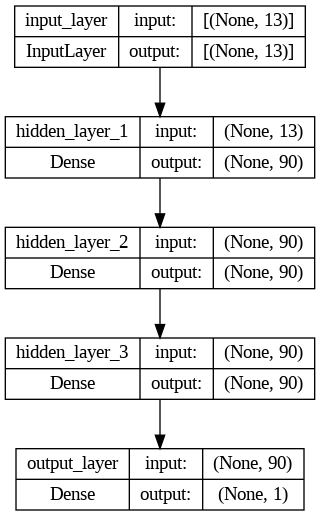

In [9]:
# Defining layers of the network
input_layer = keras.Input(shape=(13), name='input_layer')
hidden_layer_1 = keras.layers.Dense(units=90, activation='gelu', name='hidden_layer_1')(input_layer)
hidden_layer_2 = keras.layers.Dense(units=90, activation='gelu', name='hidden_layer_2')(hidden_layer_1)
hidden_layer_3 = keras.layers.Dense(units=90, activation='gelu', name='hidden_layer_3')(hidden_layer_2)
output_layer = keras.layers.Dense(units=1, activation='relu', name='output_layer')(hidden_layer_3)

# Building the model
model2 = keras.Model(inputs=input_layer, outputs=output_layer)
model2.summary()

# Plotting the model
plot_model(model2, show_shapes=True)

The **third model** (model3) has:
- 1 input layer
- 4 hidden layers: they are made up of 200 units and activated by the Leaky ReLU function which is a variant of the ReLU function that mitigates the "dying ReLU" problem.
- 1 output layer: the output layer uses the ReLU activation function.

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 13)]              0         
                                                                 
 hidden_layer_1 (Dense)      (None, 200)               2800      
                                                                 
 hidden_layer_2 (Dense)      (None, 200)               40200     
                                                                 
 hidden_layer_3 (Dense)      (None, 200)               40200     
                                                                 
 hidden_layer_4 (Dense)      (None, 200)               40200     
                                                                 
 output_layer (Dense)        (None, 1)                 201       
                                                                 
Total params: 123601 (482.82 KB)
Trainable params: 123601 (

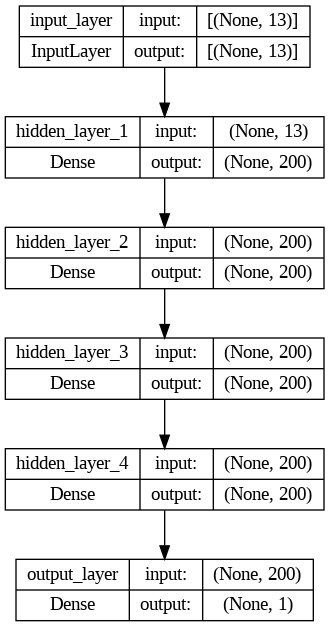

In [10]:
from keras.layers import LeakyReLU
# Defining layers of the network
input_layer = keras.Input(shape=(13), name='input_layer')
hidden_layer_1 = keras.layers.Dense(units=200, activation='LeakyReLU', name='hidden_layer_1')(input_layer)
hidden_layer_2 = keras.layers.Dense(units=200, activation='LeakyReLU', name='hidden_layer_2')(hidden_layer_1)
hidden_layer_3 = keras.layers.Dense(units=200, activation='LeakyReLU', name='hidden_layer_3')(hidden_layer_2)
hidden_layer_4 = keras.layers.Dense(units=200, activation='LeakyReLU', name='hidden_layer_4')(hidden_layer_3)
output_layer = keras.layers.Dense(units=1, activation='relu', name='output_layer')(hidden_layer_4)

# Building the model
model3 = keras.Model(inputs=input_layer, outputs=output_layer)
model3.summary()

# Plotting the model
plot_model(model3, show_shapes=True)


# Training the models

To train the model, the chosen loss functions, optimizers and metrics are as follow:
- Model1:
  *   **Loss**: MSE (Mean Squared Error) which measures the mean square errors between labels and predictions.
  *   **Optimizer**: Adam activation function with a learning rate of 0.001. In the first model, I have decided to use this activation function because it's considered to be the standard one and I wanted to see how the model behaves while using it.
  *   **Metric**: RMSE (Root Mean Squared Error) to compare the results.
- Model2:
  *   **Loss**: MSE (Mean Squared Error) which measures the mean square errors between labels and predictions.
  *   **Optimizer**: Adagrad activation function with a learning rate of 0.01. In the second model, I have decided to use this activation function because it automatically adapts the learning rate for each parameter making the parameters with higher gradients have lower learning rates.
  *   **Metric**: RMSE (Root Mean Squared Error) to compare the results.
- Model3:
  *   **Loss**: MAE (Mean Absolute Error) which computes the mean of absolute difference between labels and predictions.
  *   **Optimizer**: Adadelta activation function with a learning rate of 0.1. In the third model, I have decided to use this activation function because it was introduced to mitigate some of the problems associated with Adagrad (used in Model2). It's mainly known for its capacity to automatically adapt the learning rates to have a better convergence of the model.
  *   **Metric**: RMSE (Root Mean Squared Error) to compare the results.





In [11]:
# Model1
# Defining the loss and the optimizer
loss = keras.losses.MeanSquaredError()
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Defining a metric to evaluate the results
rmse_metric = keras.metrics.RootMeanSquaredError()

# Compiling the model with the additional information required
model1.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[rmse_metric])

In [12]:
# Model2
# Defining the loss and the optimizer
loss = keras.losses.MeanSquaredError()
optimizer = keras.optimizers.Adagrad(learning_rate=0.01)

# Defining a metric to evaluate the results
rmse_metric = keras.metrics.RootMeanSquaredError()

# Compiling the model with the additional information required
model2.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[rmse_metric])

In [13]:
# Model3
# Defining the loss and the optimizer
loss = keras.losses.MeanAbsoluteError()
optimizer = keras.optimizers.Adadelta(learning_rate=0.1)

# Defining a metric to evaluate the results
rmse_metric = keras.metrics.RootMeanSquaredError()

# Compiling the model with the additional information required
model3.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=[rmse_metric])

To train the model we use the `.fit()` method. In all 3 trainings, I have decided to keep the same number of epochs, validation_split and batch_size. \\
The validation split indicates that 20% of the dataset is going to be used to create the validation set. \\
The batch_size is a hyperparameter that has a pretty significant influence on the performance and the efficiency of the learning since it defines the number of samples used in each of the iterations of the backpropagation.

In [14]:
history1 = model1.fit(x_train, y_train, epochs=200, validation_split=0.2, batch_size=64)

Epoch 1/200
6/6 [==============================] - 2s 72ms/step - loss: 567.6639 - root_mean_squared_error: 23.8257 - val_loss: 631.1398 - val_root_mean_squared_error: 25.1225
Epoch 2/200
6/6 [==============================] - 0s 11ms/step - loss: 551.5286 - root_mean_squared_error: 23.4846 - val_loss: 609.5571 - val_root_mean_squared_error: 24.6892
Epoch 3/200
6/6 [==============================] - 0s 14ms/step - loss: 528.9644 - root_mean_squared_error: 22.9992 - val_loss: 585.8354 - val_root_mean_squared_error: 24.2040
Epoch 4/200
6/6 [==============================] - 0s 11ms/step - loss: 504.7128 - root_mean_squared_error: 22.4658 - val_loss: 560.7861 - val_root_mean_squared_error: 23.6809
Epoch 5/200
6/6 [==============================] - 0s 15ms/step - loss: 478.7458 - root_mean_squared_error: 21.8803 - val_loss: 532.6205 - val_root_mean_squared_error: 23.0786
Epoch 6/200
6/6 [==============================] - 0s 11ms/step - loss: 449.8500 - root_mean_squared_error: 21.2097 - va

In [15]:
history2 = model2.fit(x_train, y_train, epochs=200, validation_split=0.2, batch_size=64)

Epoch 1/200
6/6 [==============================] - 1s 45ms/step - loss: 465.7850 - root_mean_squared_error: 21.5821 - val_loss: 236.1456 - val_root_mean_squared_error: 15.3670
Epoch 2/200
6/6 [==============================] - 0s 11ms/step - loss: 150.0358 - root_mean_squared_error: 12.2489 - val_loss: 105.9047 - val_root_mean_squared_error: 10.2910
Epoch 3/200
6/6 [==============================] - 0s 8ms/step - loss: 70.3281 - root_mean_squared_error: 8.3862 - val_loss: 52.7237 - val_root_mean_squared_error: 7.2611
Epoch 4/200
6/6 [==============================] - 0s 12ms/step - loss: 40.6542 - root_mean_squared_error: 6.3761 - val_loss: 38.7868 - val_root_mean_squared_error: 6.2279
Epoch 5/200
6/6 [==============================] - 0s 9ms/step - loss: 31.9630 - root_mean_squared_error: 5.6536 - val_loss: 32.8589 - val_root_mean_squared_error: 5.7323
Epoch 6/200
6/6 [==============================] - 0s 8ms/step - loss: 27.8392 - root_mean_squared_error: 5.2763 - val_loss: 45.9667 -

In [16]:
history3 = model3.fit(x_train, y_train, epochs=200, validation_split=0.2, batch_size=64)

Epoch 1/200
6/6 [==============================] - 1s 41ms/step - loss: 21.9062 - root_mean_squared_error: 23.7322 - val_loss: 23.2539 - val_root_mean_squared_error: 24.9850
Epoch 2/200
6/6 [==============================] - 0s 14ms/step - loss: 21.5455 - root_mean_squared_error: 23.3891 - val_loss: 22.8083 - val_root_mean_squared_error: 24.5891
Epoch 3/200
6/6 [==============================] - 0s 12ms/step - loss: 21.0049 - root_mean_squared_error: 22.9274 - val_loss: 22.1926 - val_root_mean_squared_error: 24.0477
Epoch 4/200
6/6 [==============================] - 0s 14ms/step - loss: 20.1947 - root_mean_squared_error: 22.2370 - val_loss: 21.0115 - val_root_mean_squared_error: 22.9875
Epoch 5/200
6/6 [==============================] - 0s 11ms/step - loss: 18.6209 - root_mean_squared_error: 20.8646 - val_loss: 18.6349 - val_root_mean_squared_error: 20.8202
Epoch 6/200
6/6 [==============================] - 0s 15ms/step - loss: 15.4731 - root_mean_squared_error: 17.9969 - val_loss: 13.

Using the following function we can take a look at what happened during the training.


dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])
195 195


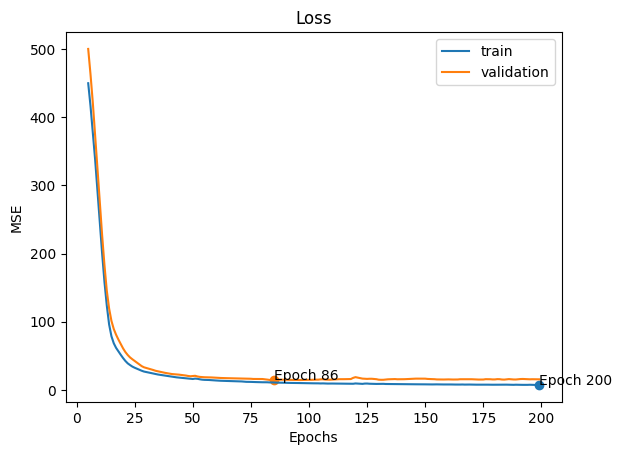

Best MSE on validation is 14.370899200439453 at epoch 86


In [17]:
# Model1
print(history1.history.keys())

def plot_performance(history1):
  start_point = 5
  x = np.arange(5, len(history1.history['loss']))
  print(len(x), len(history1.history['loss'][start_point:]))
  plt.plot(x, history1.history['loss'][start_point:], label='train')
  plt.plot(x, history1.history['val_loss'][start_point:], label='validation')
  best_epoch_train = np.argmin(history1.history['loss'])
  best_epoch_val = np.argmin(history1.history['val_loss'])
  best_mse_val = np.min(history1.history['val_loss'])
  best_mse_train = np.min(history1.history['loss'])
  plt.scatter(best_epoch_train, (history1.history['loss'][best_epoch_train]))
  plt.scatter(best_epoch_val, (history1.history['val_loss'][best_epoch_val]))
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.ylabel('MSE')
  plt.annotate(f'Epoch {best_epoch_val + 1}', (best_epoch_val, best_mse_val))
  plt.annotate(f'Epoch {best_epoch_train + 1}', (best_epoch_train, best_mse_train))
  plt.legend()
  plt.show()
  print(f'Best MSE on validation is {best_mse_val} at epoch {best_epoch_val + 1}')

plot_performance(history1)

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])
195 195


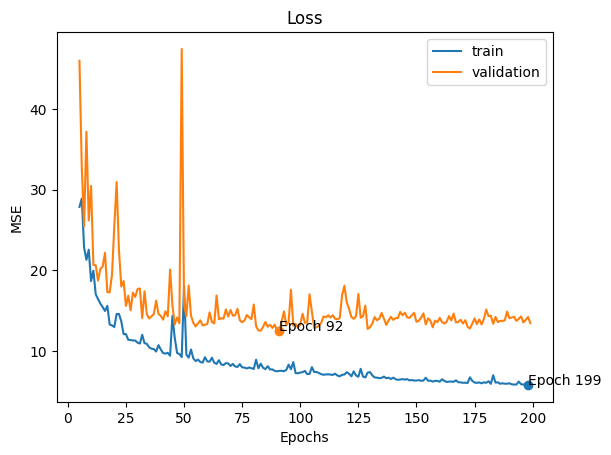

Best MSE on validation is 12.507719039916992 at epoch 92


In [18]:
# Model2
print(history2.history.keys())

plot_performance(history2)

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])
195 195


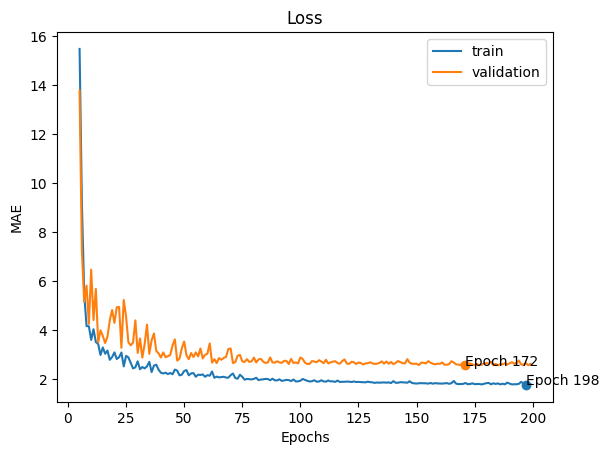

Best MAE on validation is 2.5601773262023926 at epoch 172


In [19]:
# Model3
print(history3.history.keys())

def plot_performance(history3):
  start_point = 5
  x = np.arange(5, len(history3.history['loss']))
  print(len(x), len(history3.history['loss'][start_point:]))
  plt.plot(x, history3.history['loss'][start_point:], label='train')
  plt.plot(x, history3.history['val_loss'][start_point:], label='validation')
  best_epoch_train = np.argmin(history3.history['loss'])
  best_epoch_val = np.argmin(history3.history['val_loss'])
  best_mae_val = np.min(history3.history['val_loss'])
  best_mae_train = np.min(history3.history['loss'])
  plt.scatter(best_epoch_train, (history3.history['loss'][best_epoch_train]))
  plt.scatter(best_epoch_val, (history3.history['val_loss'][best_epoch_val]))
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.ylabel('MAE')
  plt.annotate(f'Epoch {best_epoch_val + 1}', (best_epoch_val, best_mae_val))
  plt.annotate(f'Epoch {best_epoch_train + 1}', (best_epoch_train, best_mae_train))
  plt.legend()
  plt.show()
  print(f'Best MAE on validation is {best_mae_val} at epoch {best_epoch_val + 1}')

plot_performance(history3)

The loss value implies how well or poorly a certain model behaves after each iteration of optimization. Ideally, we would want a decreasing loss at each iteration. \\
In regards to our 3 graphs, all 3 models have a decreasing loss both on the training and the validation set.\
This means that the chances of overfitting are quite low and we don't necessarily have to use any regularization techniques.
However, we can clearly tell that some models decrease much faster than others.
The first and third model have a much linear descend, compared to the second model that uses Adagrad that still has some spikes up until the 50th epoch.

# Testing the models

Using the `.evaluate()` method and using the test set as input, we can output the values associated with the chosen loss function and the metrics. \\
Taking a look at all the models we can see that the lowest loss is detected by the last model which uses Adadelta and the highest is given by the first model which uses Adam.

In [20]:
mse1, rmse1 = model1.evaluate(x_test, y_test)
mse2, rmse2 = model2.evaluate(x_test, y_test)
mae, rmse = model3.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.0001 - root_mean_squared_error: 4.4469


If we want to predict the price of the houses in our test set, we just need to use the `predict` function providing just the attributes of our test set. \\
Taking a look at all the models I would say that most of the points are pretty aligned with each other, meaning that the predictions are actually close to the ground truth.


# Model 1

4/4 [==============================] - 0s 2ms/step


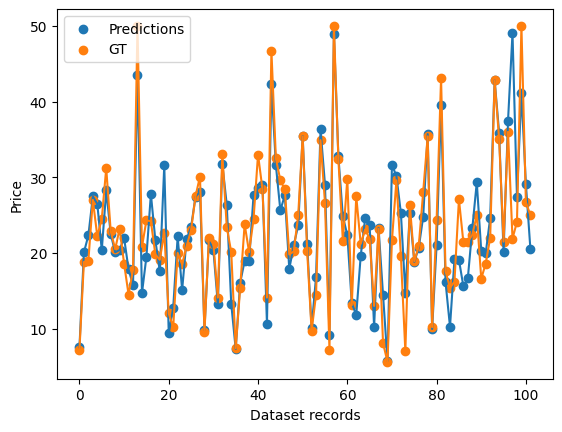

In [21]:
predictions = model1.predict(x_test)

def compare_predictions(pred, gt):
  plt.plot(predictions)
  plt.plot(gt)
  plt.scatter(np.arange(0, len(pred)),pred, label='Predictions')
  plt.scatter(np.arange(0, len(gt)), gt, label='GT')
  plt.ylabel('Price')
  plt.xlabel('Dataset records')
  plt.legend()
  plt.show()

compare_predictions(predictions, y_test)

## Model 2

4/4 [==============================] - 0s 3ms/step


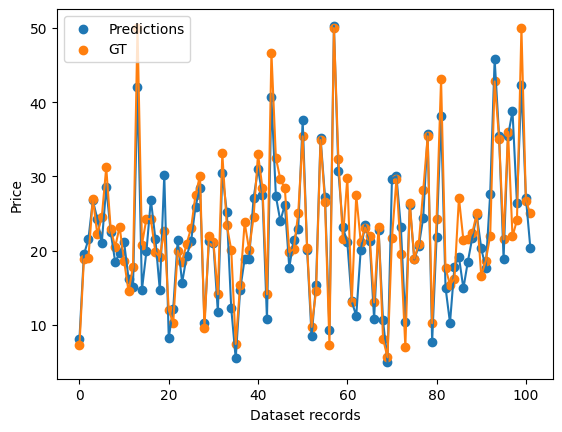

In [22]:
predictions = model2.predict(x_test)
compare_predictions(predictions, y_test)

## Model 3

4/4 [==============================] - 0s 3ms/step


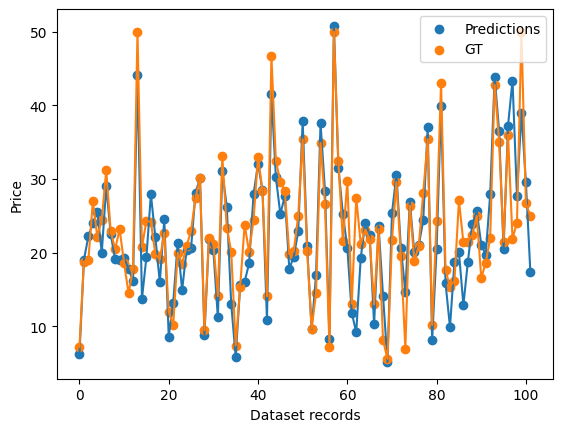

In [23]:
predictions = model3.predict(x_test)
compare_predictions(predictions, y_test)